<a href="https://colab.research.google.com/github/Shibu4064/Thesis_Final/blob/main/classification_with_buetcsenlp_bert_finetuned_UPDATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets
!pip install transformers
!pip install transformers[torch]
!pip install transformers[tf-cpu]
!pip install transformers[flax]
!pip install torch
!pip install tensorflow
!pip install evaluate
!pip install torchsummary
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.2/465.2 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 35.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is comp

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import transformers
import torch.nn as nn
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import AutoModelForMaskedLM, AutoModelForPreTraining, EarlyStoppingCallback, AutoModelForSequenceClassification, BertForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from transformers import BertForMaskedLM, DistilBertForMaskedLM
from transformers import BertTokenizer, DistilBertTokenizer
from transformers import RobertaTokenizer, RobertaForMaskedLM
from transformers import Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling
from tokenizers import BertWordPieceTokenizer

In [ ]:
# torch.set_default_device('cuda')

In [ ]:
# import gdown

# dataset_link = "https://drive.google.com/uc?id=1FoyySUxspmkT4KNwSsYWDqw8TVUF-meV"

# gdown.download(dataset_link,"checkpoint.zip")



In [3]:
import gdown

model_link = "https://drive.google.com/uc?id=13_EjhEs7NUTs8dw_xzCKDzhKlaSAyktR"
config_link = "https://drive.google.com/uc?id=1-yXyTCRd8uCC9Zca-EigUzuDBqCulP2e"

gdown.download(model_link,"model.bin")
gdown.download(config_link,"config.json")

Downloading...
From (original): https://drive.google.com/uc?id=13_EjhEs7NUTs8dw_xzCKDzhKlaSAyktR
From (redirected): https://drive.google.com/uc?id=13_EjhEs7NUTs8dw_xzCKDzhKlaSAyktR&confirm=t&uuid=34664733-885c-4445-8a08-c7205da90d54
To: /content/model.bin
100%|██████████| 443M/443M [00:04<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-yXyTCRd8uCC9Zca-EigUzuDBqCulP2e
To: /content/config.json
100%|██████████| 782/782 [00:00<00:00, 1.40MB/s]


'config.json'

In [4]:
from transformers import AutoTokenizer, AutoModel, AutoConfig

model_name = "csebuetnlp/banglabert"

tokenizer = AutoTokenizer.from_pretrained(model_name)
config = AutoConfig.from_pretrained("config.json")

model = AutoModel.from_pretrained("model.bin",config=config)

classifier = AutoModelForSequenceClassification.from_pretrained(model_name,num_labels=3)

# classifier.encoder = model.encoder
# classifier.embeddings = model.embeddings
# model

classifier.electra.embeddings = model.embeddings
classifier.electra.encoder = model.encoder
classifier


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [5]:
# for param in classifier.electra.embeddings.parameters():
#   param.requires_grad=False

for i in range(5):
  for param in classifier.electra.encoder.layer[i].parameters():
    param.requires_grad=False

# for param in classifier.electra.encoder.parameters():
#   param.requires_grad=False

# classifier.electra.encoder.layer[0]

In [6]:
for name, param in classifier.named_parameters():
  print("name: ",name," ","Trainable: ",param.requires_grad)

name:  electra.embeddings.word_embeddings.weight   Trainable:  True
name:  electra.embeddings.position_embeddings.weight   Trainable:  True
name:  electra.embeddings.token_type_embeddings.weight   Trainable:  True
name:  electra.embeddings.LayerNorm.weight   Trainable:  True
name:  electra.embeddings.LayerNorm.bias   Trainable:  True
name:  electra.encoder.layer.0.attention.self.query.weight   Trainable:  False
name:  electra.encoder.layer.0.attention.self.query.bias   Trainable:  False
name:  electra.encoder.layer.0.attention.self.key.weight   Trainable:  False
name:  electra.encoder.layer.0.attention.self.key.bias   Trainable:  False
name:  electra.encoder.layer.0.attention.self.value.weight   Trainable:  False
name:  electra.encoder.layer.0.attention.self.value.bias   Trainable:  False
name:  electra.encoder.layer.0.attention.output.dense.weight   Trainable:  False
name:  electra.encoder.layer.0.attention.output.dense.bias   Trainable:  False
name:  electra.encoder.layer.0.attention

In [7]:
# bangla_bert = AutoModelForMaskedLM.from_pretrained("")

# tokenizer_name = 'sagorsarker/bangla-bert-base'

# tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, use_fast=True)

train_texts = ["আমার কিছু ভালো লাগে না","আমার সব কিছুই ভালো লাগে"]
train_encodings = tokenizer(train_texts, truncation=True, padding=True)

# train_encodings["input_ids"]

# print(train_encodings['input_ids'])

output = classifier(torch.tensor(train_encodings["input_ids"]))
# print(output[0].shape)
print(output[0].shape)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


torch.Size([2, 3])


In [8]:
import gdown

train_data_link = "https://drive.google.com/uc?id=1Xyeg3IxldXQYD3OI3l_NAlvp7J919Y8E"
gdown.download(train_data_link,"train.csv")

val_data_link = "https://drive.google.com/uc?id=1_ZC_nBd1CZSR6QLduZAsvuTpKsEShzHS"
gdown.download(val_data_link,"val.csv")

# fine_tuned_model_path = "https://drive.google.com/uc?id=1VchxbcjhTE4G0AhiJuFbvO_Mnfwhp1Mp"
# gdown.download(fine_tuned_model_path,"fine_tuned_bert.pth")

Downloading...
From (original): https://drive.google.com/uc?id=1Xyeg3IxldXQYD3OI3l_NAlvp7J919Y8E
From (redirected): https://drive.google.com/uc?id=1Xyeg3IxldXQYD3OI3l_NAlvp7J919Y8E&confirm=t&uuid=04929b36-fda9-423f-a02e-506e41c9fe7e
To: /content/train.csv
100%|██████████| 209M/209M [00:02<00:00, 99.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ZC_nBd1CZSR6QLduZAsvuTpKsEShzHS
To: /content/val.csv
100%|██████████| 44.8M/44.8M [00:00<00:00, 63.9MB/s]


'val.csv'

In [9]:
# import pandas as pd
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("val.csv")
display(train_df)

,Headline,Content,Label
0,কলকাতায় বোমা বিস্ফোরণে নিহত ১,ভারতের পশ্চিমবঙ্গের রাজধানী কলকাতায় একটি বাজার...,3
1,১৫ ঘণ্টা পর ময়মনসিংহের পথে ট্রেন চালু,ময়মনিসংহ স্টেশনের সুপারিনটেনডেন্ট জহিরুল হক জা...,2
2,ময়মনসিংহে আ.লীগের মামলায় আসামি ছাত্রলীগ,ময়মনসিংহ মহানগর আওয়ামী লীগের সভাপতি এহতেশামূল ...,3
3,পর্ণ দেখার শীর্ষে চট্টগ্রামের ছেলেরা,বন্দর নগরী চট্টগ্রামে পাশ্চাত্যের ছোঁয়া লেগেছ...,0
4,নড়াইলে কর্তব্যরত অবস্থায় পুলিশ সদস্যের মৃত্যু,নড়াইলের কালিয়ায় কর্তব্যরত অবস্থায় হৃদরোগে আক্র...,3
...,...,...,...
42375,নৌমন্ত্রীর আশ্বাসে কোটা বহালের আন্দোলন স্থগিত,নৌমন্ত্রীর আশ্বাসে সরকারি চাকরিতে কোটা বহালের ...,3
42376,কাঠগড়ায় দাঁড়াতে হয়েছিল শাস্ত্রীকে!,দুদিন আগেই এশিয়া কাপের শিরোপা নিয়ে সংযুক্ত আরব...,3
42377,ইয়াসের ক্ষতিপূরণ চেয়ে ভুরি ভুরি ‘ভুয়ো আবেদনপত্...,এ যেন সেই আমফানেরই পুনরাবৃত্তি। আমফানের পর ক্ষ...,2
42378,বগুড়ার সারিয়াকান্দিতে বন্যা পরিস্থিতি অবনতি,বগুড়ার সারিয়াকান্দিতে যমুনা নদীর পানি বৃদ্ধি অ...,3


In [10]:
display(val_df)

,Headline,Content,Label
0,"সোনারগাঁয়ে দুই যুবক খুন , আটক ৩","স্টাফ রিপোর্টার, নারায়ণগঞ্জ ॥ সোনারগাঁও উপজেলা...",3
1,ফ্ল্যাশব্যাক: মূল গণতন্ত্র রাস্তায় সহিংসতার আ...,আমরা বিস্মিত কেন আজ গোলাগুলির মত সংঘর্ষ ঘটেছে।...,1
2,হ্যাট্রিকসহ তাহিরের ছয় উইকেট,জিম্বাবুয়ের বিপক্ষে তিন ম্যাচ ওয়ানডে সিরিজের দ...,3
3,বেঁচে যাওয়া ৪ কোটি ৪৪ লাখ টাকা ফেরত দিলেন ঠিকাদার,চট্টগ্রাম মহানগরীতে বরাদ্দকৃত অর্থের চেয়ে কম ট...,2
4,"মুম্বই মেলে ঘুরছিল ভুয়ো টিকিট পরীক্ষক, আই কার্...","ভুয়ো শিক্ষক, ভুয়ো চিকিৎসকের কথা শোনা গিয়েছে। ক...",1
...,...,...,...
9077,"সাইবার জালিয়াতি থেকে সাবধান, এই নম্বর থেকে ফোন...",দেশে ক্রমেই বাড়ছে সাইবার জালিয়াতি। বিভিন্ন উপ...,0
9078,মুক্তিযোদ্ধা কোটা রাখার দাবিতে চট্টগ্রামে অবরোধ,সরকারি চাকরিতে ৩০ শতাংশ মুক্তিযোদ্ধা কোটা বহাল...,3
9079,অবসর পুটুর লোম ছাঁটি: মকসুদ,মতিনিধি বিশিষ্ট ইতিহাসবিদ কলামিষ্ট গান্ধীবাদী ...,0
9080,কার সম্মেলনের বক্তৃতা আরও বেশি দর্শক লাভ করেছি...,আর্থিক বাজারে আমার সাফল্য আমাকে অন্য সব মানুষে...,2


In [ ]:
HCSep=" //// "
from sklearn.model_selection import train_test_split
def pandaToList(dataset):
    text_list = []
    label_list = []
    for i in range(len(dataset['Headline'])):
      text_list.append(str(dataset['Headline'][i])+HCSep+str(dataset['Content'][i]))
      label_list.append(int(dataset['Label'][i]))
    return text_list, label_list

train_texts, train_labels =  pandaToList(train_df)
val_texts, val_labels = pandaToList(val_df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

In [ ]:
# print(train_encodings['input_ids'][0])
# print(val_encodings["input_ids"][0])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [ ]:
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_df['Label'])
encoded_valid_labels = label_encoder.transform(val_df['Label'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    train_encodings['input_ids'], encoded_train_labels, test_size=0.2, random_state=42
)

In [ ]:
svm_model = svm.SVC(kernel='rbf', gamma=0.8, C=0.3)
svm_model.fit(X_train, y_train)

In [ ]:
y_pred_val = svm_model.predict(X_val)

In [ ]:
label_encoder.classes_ = label_encoder.classes_.astype(str)

In [ ]:
#conf_matrix_val = confusion_matrix(y_val, y_pred_val)
classification_report_val = classification_report(y_val, y_pred_val, target_names=label_encoder.classes_)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("\nClassification Report (Validation Set):")
print(classification_report_val)

In [ ]:
import torch

class ViolenceDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ViolenceDataset(train_encodings, train_labels,)
val_dataset = ViolenceDataset(val_encodings, val_labels)

In [ ]:


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred, average='micro')
    precision = precision_score(y_true=labels, y_pred=pred, average='micro')
    f1 = f1_score(y_true=labels, y_pred=pred, average='micro')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}



In [ ]:
from transformers import  Trainer, TrainingArguments, EarlyStoppingCallback, IntervalStrategy, AutoModelForSequenceClassification

training_args = TrainingArguments(
   f"training_with_callbacks",
   evaluation_strategy = IntervalStrategy.STEPS, # "steps"
   #output_dir= output_dir,
  #  output_dir="/content/drive/MyDrive/model_emnlp/buetcsenlp_banglabert_finetuned_classifier",
   eval_steps = 250, # Evaluation and Save happens every 250 steps
   save_total_limit = 5, # Only last 5 models are saved. Older ones are deleted.

   learning_rate=2e-5,
   per_device_train_batch_size=1,
   per_device_eval_batch_size=1,
   num_train_epochs=50,
   weight_decay=0.01,
   metric_for_best_model = 'f1',
  #  generator=torch.Generator(device='cuda'),
   load_best_model_at_end=True)

trainer = Trainer(
    model=classifier,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,            # evaluation dataset
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    # generator=torch.Generator(device='cuda'),
    callbacks = [EarlyStoppingCallback(early_stopping_patience=5)]
)
# trainer.to('cuda')

In [ ]:
trainer.train()

You're using a ElectraTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
250,No log,0.754752,0.711278,0.711278,0.711278,0.711278
500,0.913900,0.803980,0.769925,0.769925,0.769925,0.769925
750,0.913900,1.042957,0.772932,0.772932,0.772932,0.772932
1000,0.994500,0.958461,0.767669,0.767669,0.767669,0.767669
1250,0.994500,1.024884,0.777444,0.777444,0.777444,0.777444
1500,1.041800,1.020664,0.769173,0.769173,0.769173,0.769173
1750,1.041800,0.822651,0.783459,0.783459,0.783459,0.783459
2000,1.067600,1.181426,0.747368,0.747368,0.747368,0.747368
2250,1.067600,1.028344,0.782707,0.782707,0.782707,0.782707
2500,1.004200,1.301290,0.752632,0.752632,0.752632,0.752632


TrainOutput(global_step=4250, training_loss=0.9575290491440717, metrics={'train_runtime': 701.9307, 'train_samples_per_second': 296.824, 'train_steps_per_second': 296.824, 'total_flos': 340711320222000.0, 'train_loss': 0.9575290491440717, 'epoch': 1.02})

In [ ]:
trainer.save_model("/content/drive/MyDrive/model_emnlp/buetcsenlp_banglabert_finetuned_classifier")

In [ ]:
!zip -r /content/drive/MyDrive/model_emnlp/checkpoint_at_9500.zip /content/training_with_callbacks/checkpoint-9500

  adding: content/training_with_callbacks/checkpoint-9500/ (stored 0%)
  adding: content/training_with_callbacks/checkpoint-9500/vocab.txt (deflated 71%)
  adding: content/training_with_callbacks/checkpoint-9500/optimizer.pt (deflated 36%)
  adding: content/training_with_callbacks/checkpoint-9500/special_tokens_map.json (deflated 42%)
  adding: content/training_with_callbacks/checkpoint-9500/scheduler.pt (deflated 49%)
  adding: content/training_with_callbacks/checkpoint-9500/rng_state.pth (deflated 28%)
  adding: content/training_with_callbacks/checkpoint-9500/trainer_state.json (deflated 79%)
  adding: content/training_with_callbacks/checkpoint-9500/tokenizer_config.json (deflated 47%)
  adding: content/training_with_callbacks/checkpoint-9500/tokenizer.json (deflated 76%)
  adding: content/training_with_callbacks/checkpoint-9500/config.json (deflated 54%)
  adding: content/training_with_callbacks/checkpoint-9500/training_args.bin (deflated 48%)
  adding: content/training_with_callbac

In [ ]:
!pip install -q transformers
!pip install -q peft accelerate bitsandbytes safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data with model names and accuracy values
data = {
    'Model': ['SVM', 'LR', 'BanglaBERT','SagorBERT', 'M-BERT-c', 'M-BERT-unc', 'BLOOM'],
    'Accuracy': [0.85, 0.92, 0.78, 0.88, 0.86, 0.85, 0.98]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar chart
df.plot(x='Model', y='Accuracy', kind='bar', legend=False, color='cyan')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits (0 to 1 for accuracy)
plt.show()

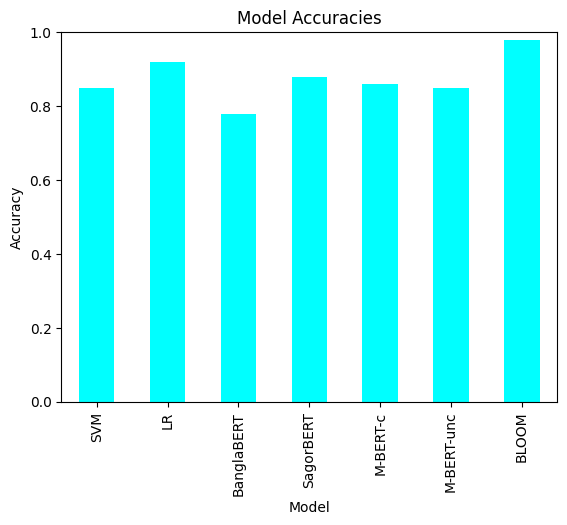

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data with model names and accuracy values
data = {
    'Model': ['SVM', 'LR', 'BanglaBERT','SagorBERT', 'M-BERT-c', 'M-BERT-unc', 'BLOOM'],
    'Accuracy': [0.85, 0.92, 0.78, 0.88, 0.86, 0.85, 0.98]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar chart
df.plot(x='Model', y='Accuracy', kind='bar', legend=False, color='cyan')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits (0 to 1 for accuracy)
plt.show()


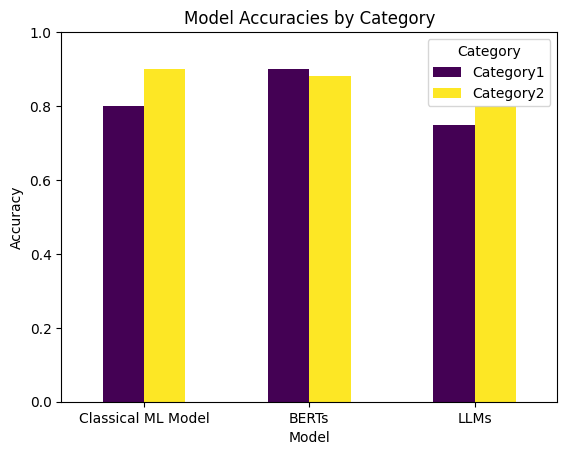

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data with model names, categories, and accuracy values
data = {
    'Model': ['Classical ML Model', 'BERTs', 'LLMs'],
    'Category1': [0.80, 0.90, 0.75],
    'Category2': [0.90, 0.88, 0.80],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set 'Model' as the index for better visualization
df.set_index('Model', inplace=True)

# Create a grouped bar chart
ax = df.plot(kind='bar', rot=0, colormap='viridis')
plt.title('Model Accuracies by Category')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits (0 to 1 for accuracy)
plt.legend(title='Category')

# Show the plot
plt.show()
